In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## DataSet

In [8]:
df = pd.read_csv("data.csv")

In [9]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
df.shape

(215, 15)

## Preprocessing
- Salary는 status가 Not Placed면 존재하지 않음으로 삭제 


In [13]:
df = df.drop(columns=['salary'])


In [14]:
df.shape

(215, 14)

In [15]:
df.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
dtype: int64

### EDA(탐색적 데이터 분석)

In [16]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000


C:\Users\김대욱\AppData\Local\Temp\ipykernel_12744\2922092378.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2', ax=axes[i])
C:\Users\김대욱\AppData\Local\Temp\ipykernel_12744\2922092378.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2', ax=axes[i])
C:\Users\김대욱\AppData\Local\Temp\ipykernel_12744\2922092378.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2', ax=axes[i])
C:\Users\김대욱\AppData\Local\Temp\ipykernel_12744\2922092378.py:12: FutureW

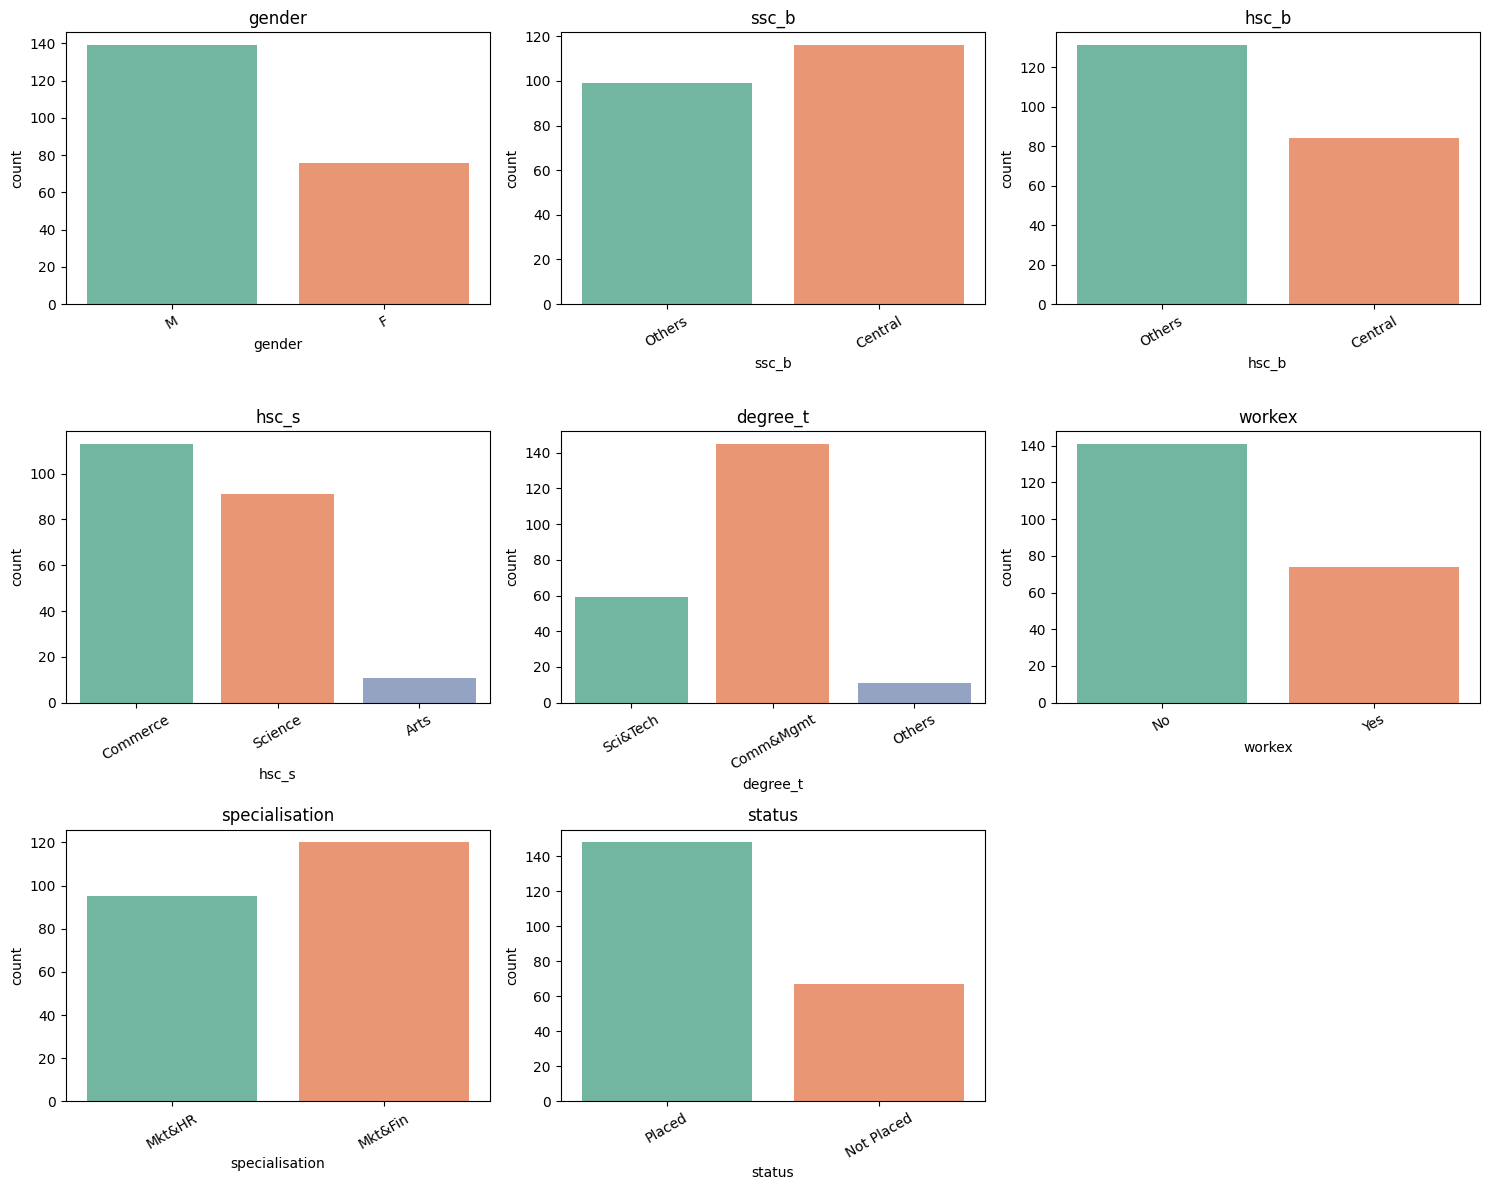

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']

n_cols = 3  # 한 줄에 그래프 3개씩
n_rows = -(-len(categorical_cols) // n_cols)  # 전체 행 개수 올림 계산
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, palette='Set2', ax=axes[i])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=30)

# 남는 서브플롯 제거 (그래프가 7개인데 subplot은 9개일 경우)
for j in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


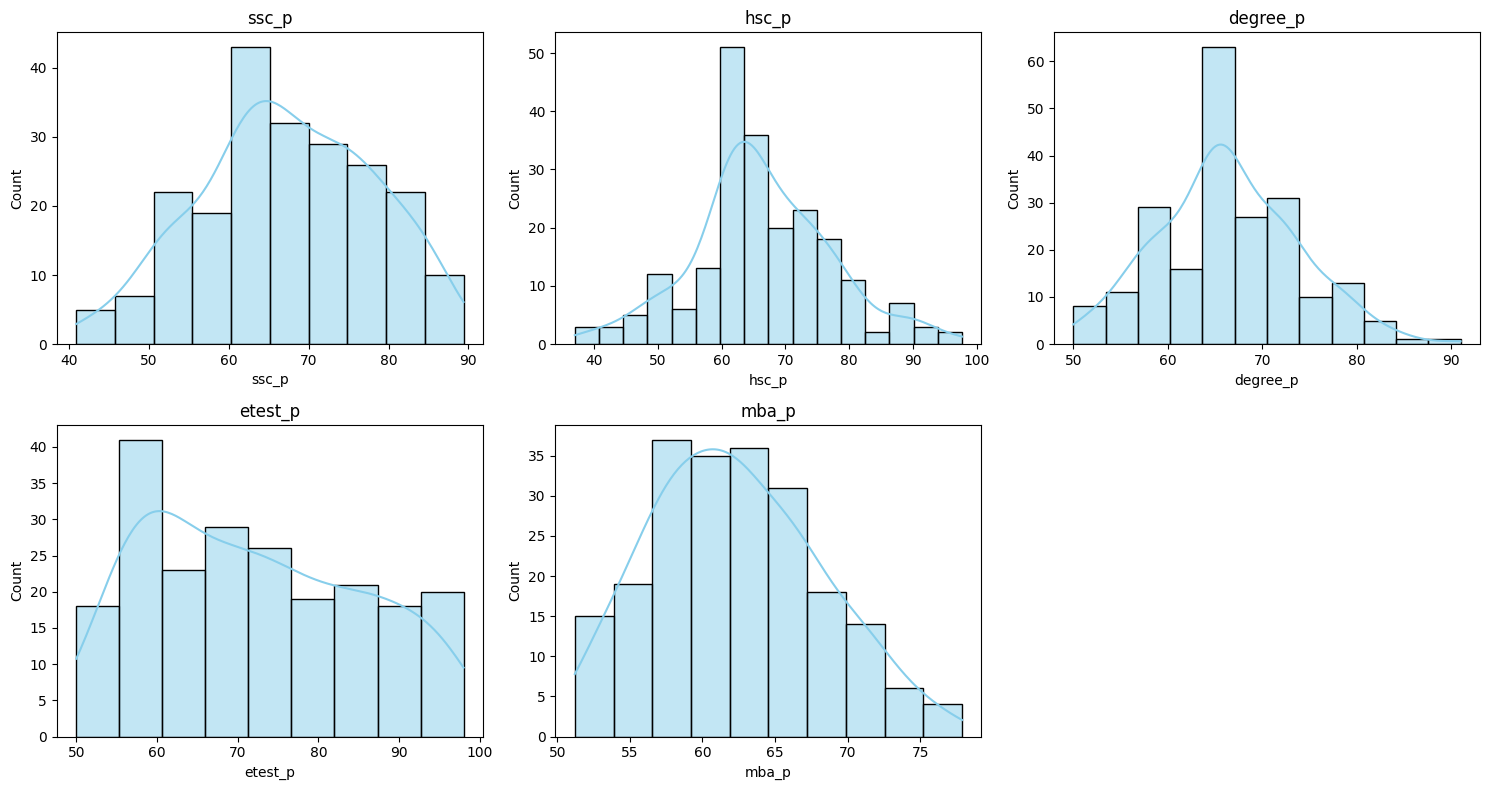

In [49]:
# 수치형 변수 

numerical_cols = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']

n_cols = 3  # 한 줄에 최대 3개
n_rows = -(-len(numerical_cols) // n_cols)  # 올림 계산
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(col)

# 남는 서브플롯 제거
for j in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### 번주형 변수 인코딩

gender: M→1, F→0

status: Placed→1, Not Placed→0

In [31]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
le = LabelEncoder()

for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

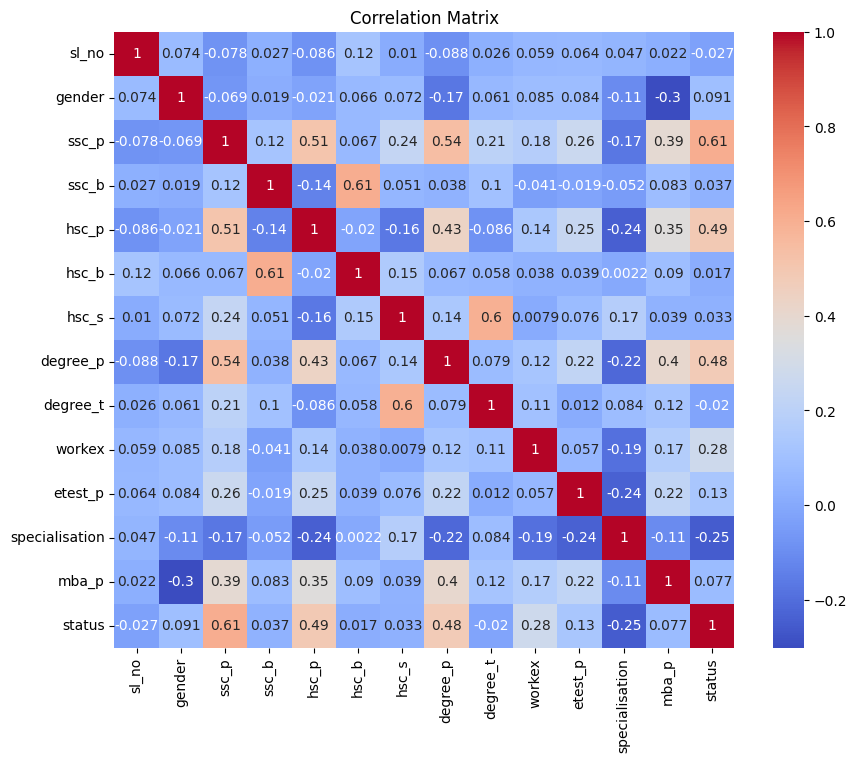

In [33]:
plt.figure(figsize=(10,8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관행렬
corr_matrix = df_encoded.corr()

# 타겟(status)과의 상관관계만 추출
target_corr = corr_matrix['status'].sort_values(ascending=False)

print("📊 'Placed' (y=1)와 가장 관련 깊은 변수:")
print(target_corr)

📊 'Placed' (y=1)와 가장 관련 깊은 변수:
status            1.000000
ssc_p             0.607889
hsc_p             0.491228
degree_p          0.479861
workex            0.276060
etest_p           0.127639
gender            0.090670
mba_p             0.076922
ssc_b             0.037297
hsc_s             0.033442
hsc_b             0.016945
degree_t         -0.020352
sl_no            -0.026859
specialisation   -0.250655
Name: status, dtype: float64


C:\Users\김대욱\AppData\Local\Temp\ipykernel_12744\1520891870.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr.values, y=target_corr.index, palette="coolwarm")


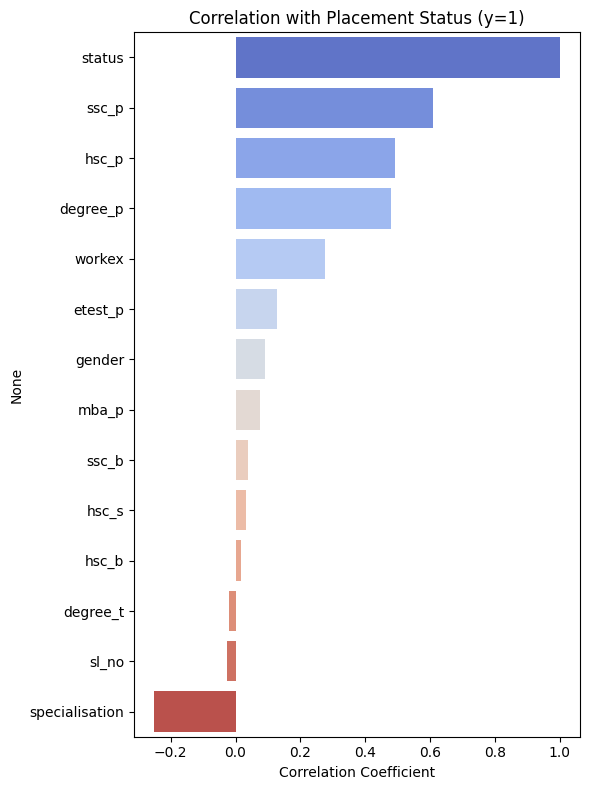

In [39]:
plt.figure(figsize=(6, 8))
sns.barplot(x=target_corr.values, y=target_corr.index, palette="coolwarm")
plt.title("Correlation with Placement Status (y=1)")
plt.xlabel("Correlation Coefficient")
plt.tight_layout()
plt.show()

### Monotonicity 체크

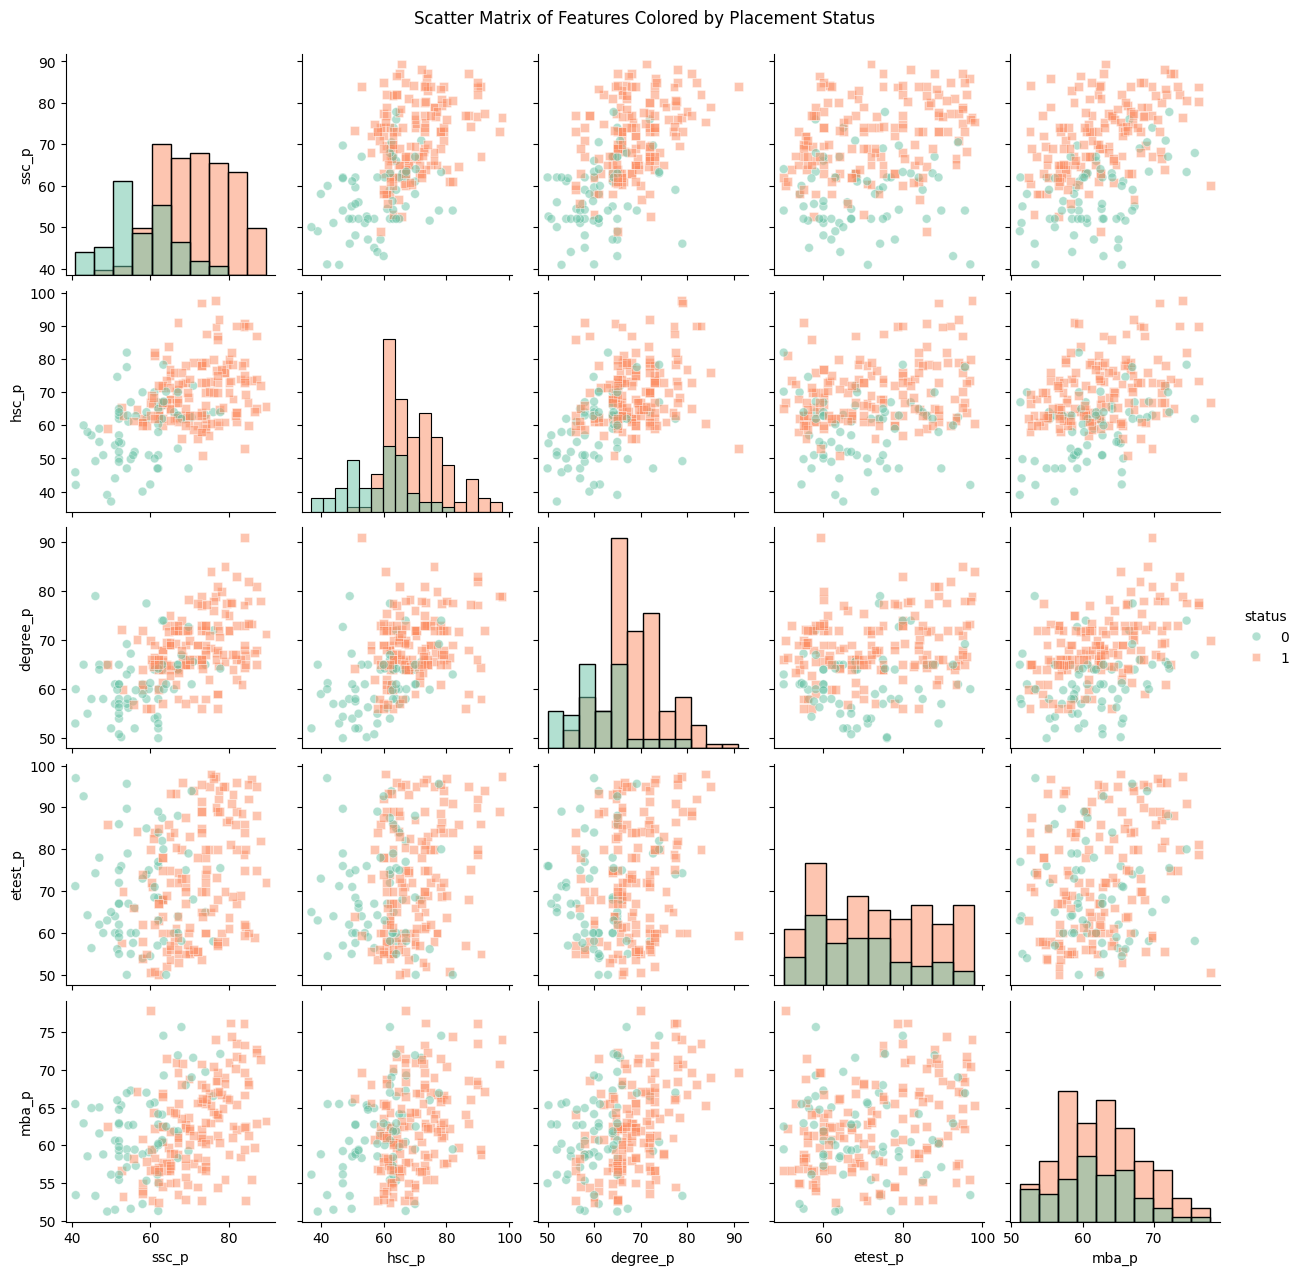

In [41]:
# 수치형 변수만 선택 (원하는 조합으로 바꿔도 됨)
features = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']  # 수정 가능

# pairplot 그리기
sns.pairplot(df_encoded[features + ['status']],
             hue='status',
             palette='Set2',
             diag_kind='hist',
             markers=["o", "s"],  # 0은 원형(o), 1은 사각형(s)
             plot_kws={'alpha': 0.5, 's': 40})  # 투명도, 점 크기
plt.suptitle("Scatter Matrix of Features Colored by Placement Status", y=1.02)
plt.show()

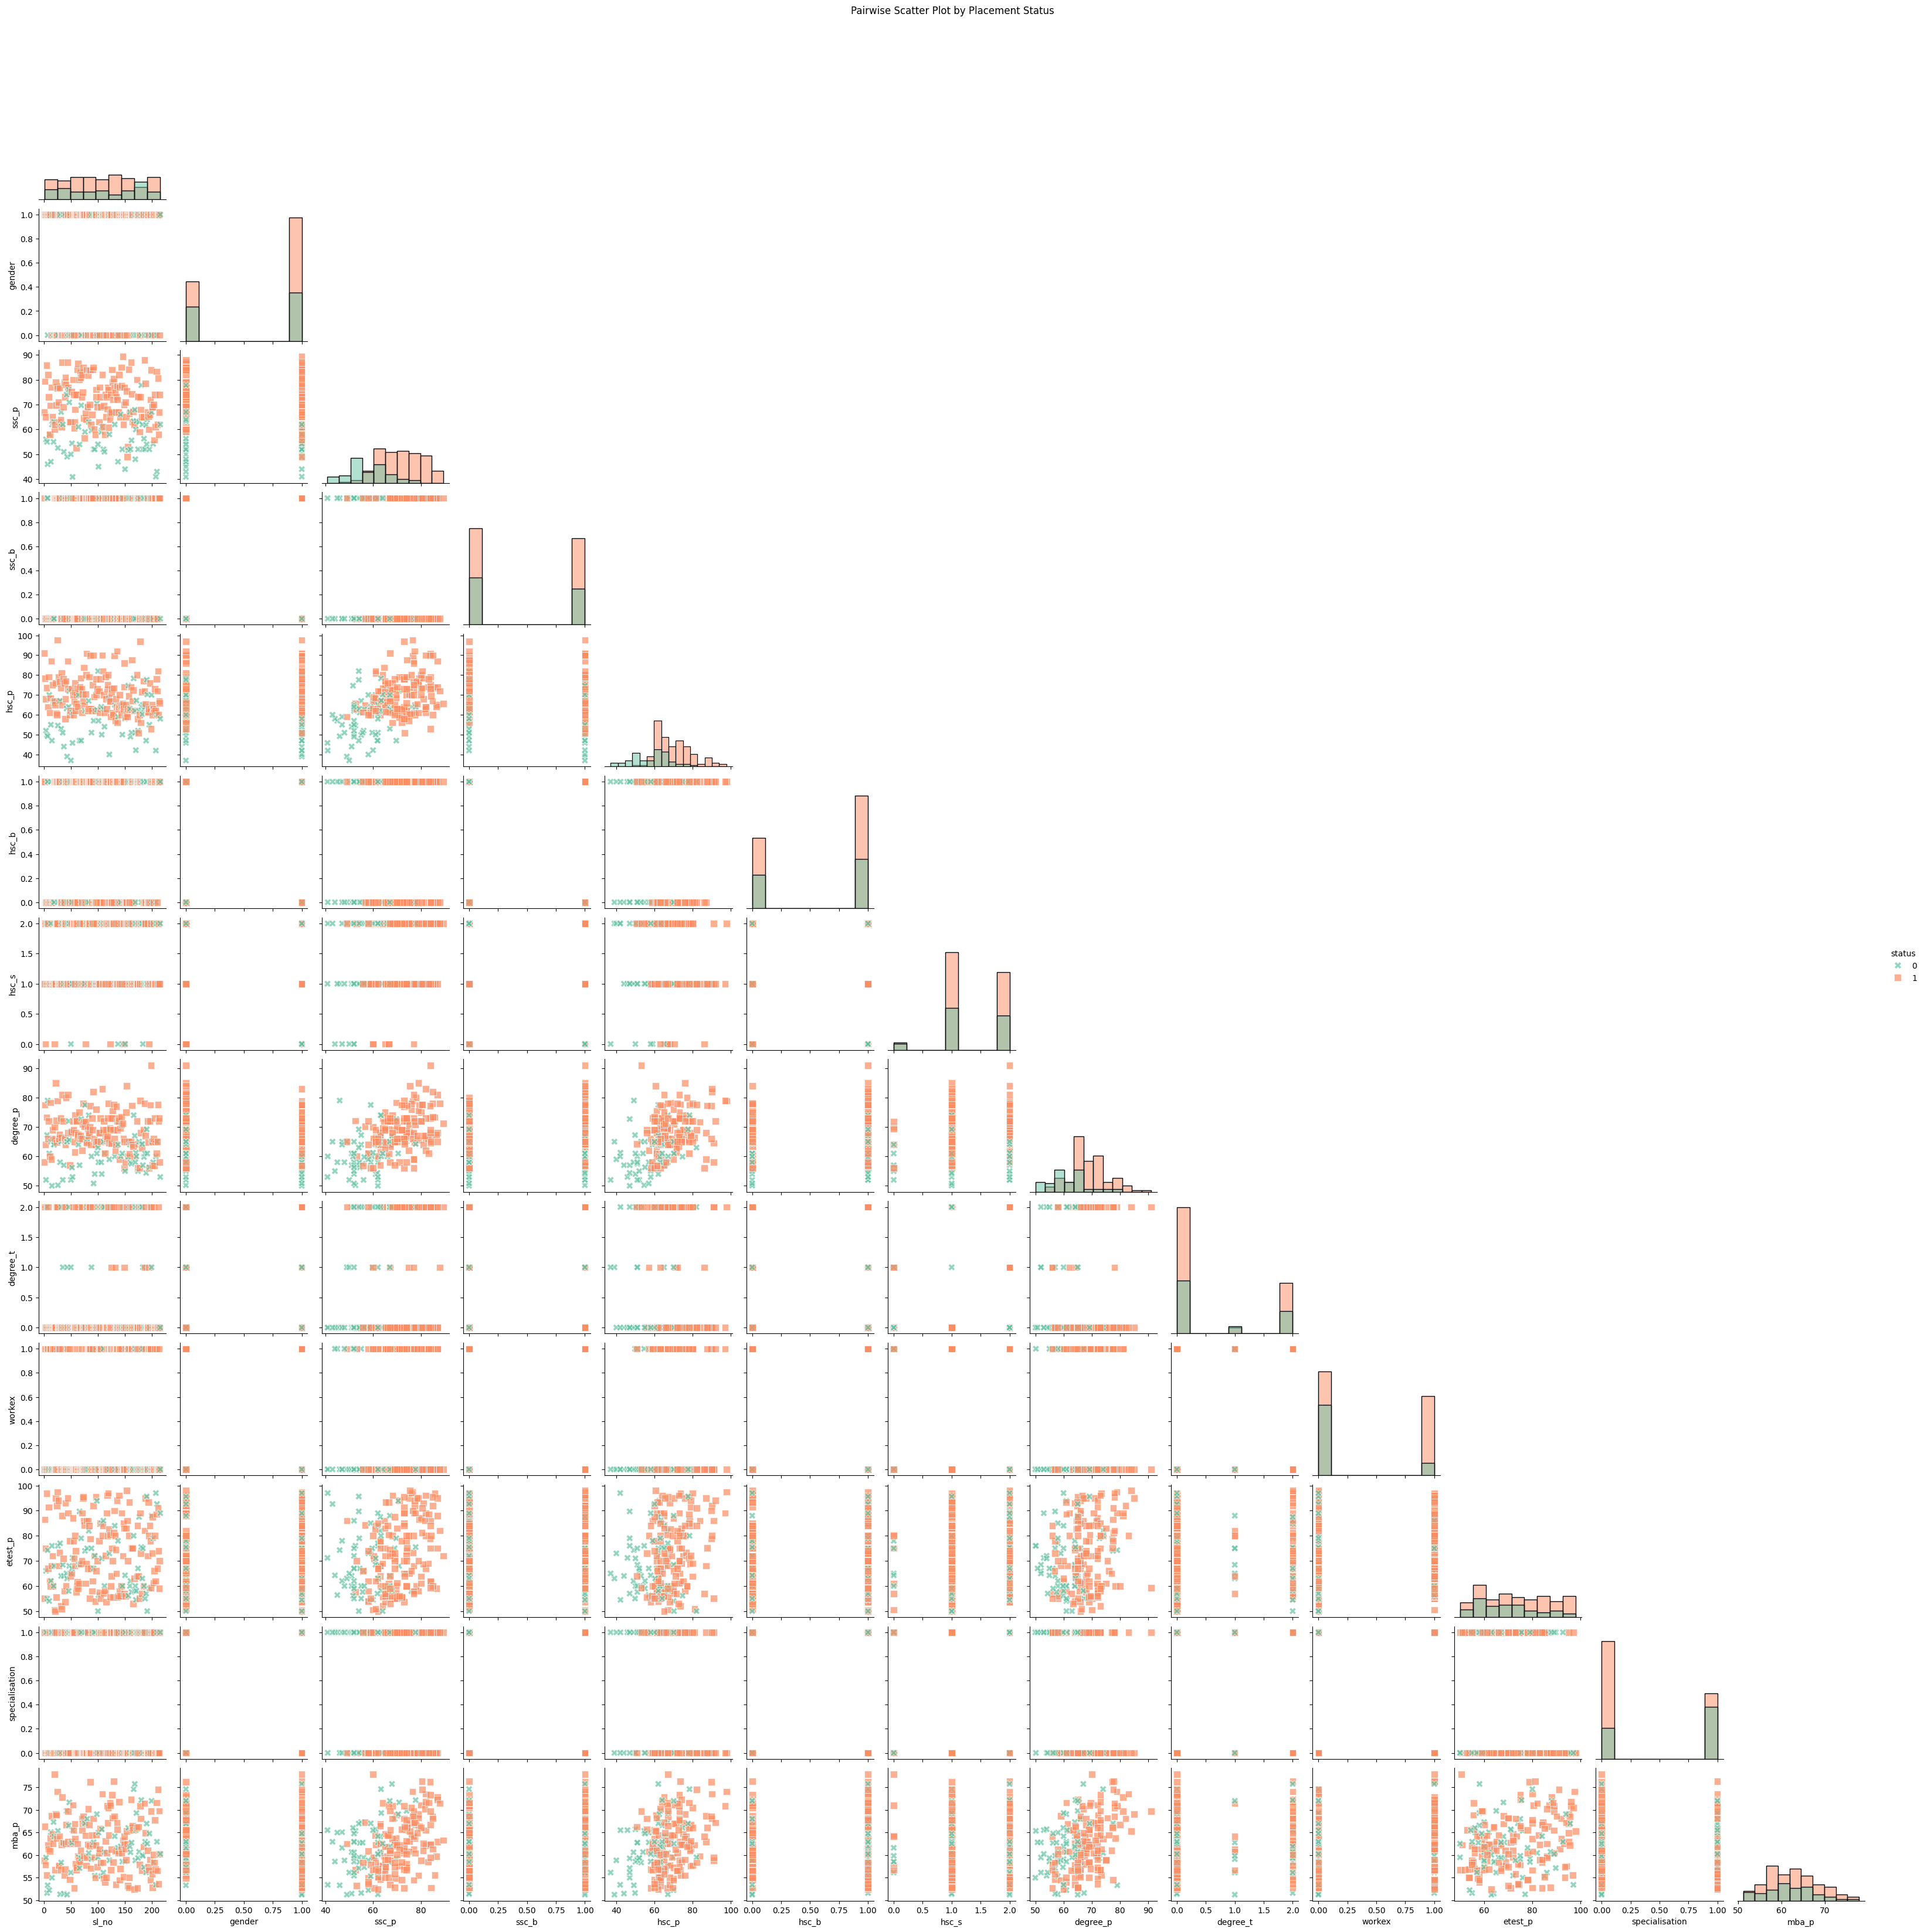

In [43]:
predictors = df_encoded.columns.drop('status')
sns.pairplot(df_encoded,
             vars=predictors,
             hue='status',            # 이진 분류 값 (0 = Not Placed, 1 = Placed)
             hue_order=[0, 1],
             diag_kind='hist',
             kind='scatter',
             markers=["X", "s"],
             plot_kws={"s": 70, "alpha": 0.7},
             palette="Set2",
             corner=True)

plt.suptitle("Pairwise Scatter Plot by Placement Status", y=1.02)
plt.show()


🔥 중요 변수 Top 5 (sl_no 제외): ['ssc_p', 'hsc_p', 'degree_p', 'mba_p', 'etest_p']


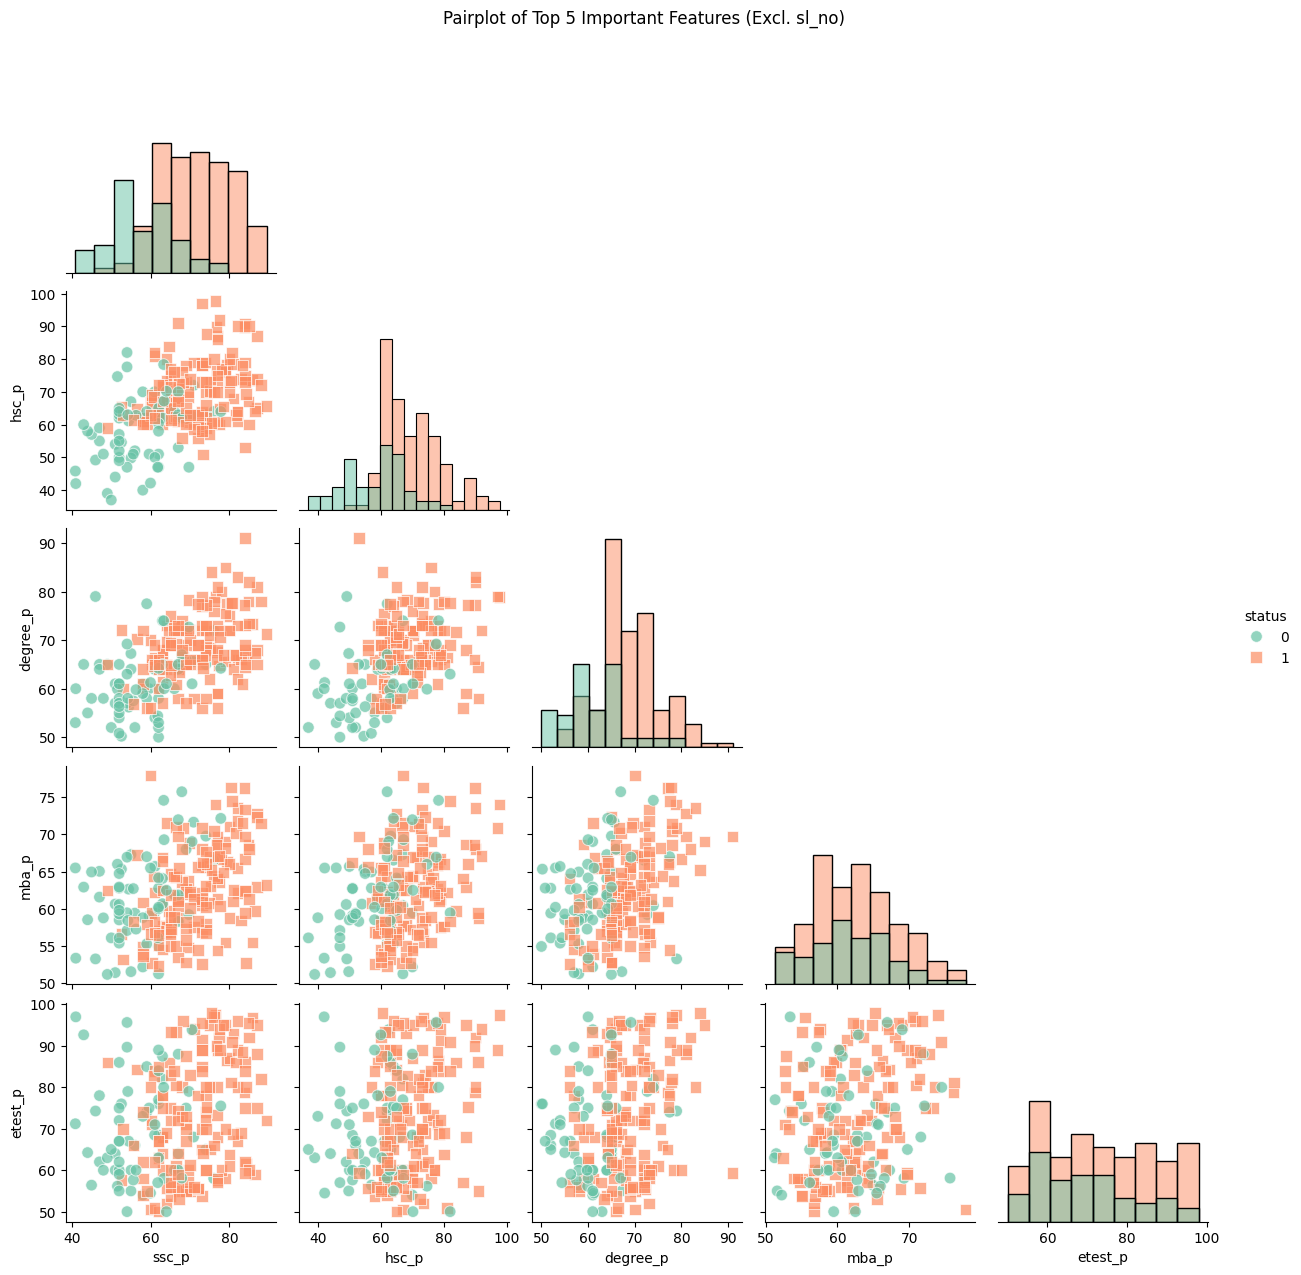

In [52]:


# 1. sl_no 제거한 입력값 정의
X = df_encoded.drop(columns=['status', 'sl_no'])
y = df_encoded['status']

# 2. 모델 학습 및 중요도 계산
model = RandomForestClassifier(random_state=0)
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
top5 = importances.head(5).index.tolist()

print("🔥 중요 변수 Top 5 (sl_no 제외):", top5)

# 3. pairplot 시각화
sns.pairplot(df_encoded,
             vars=top5,
             hue='status',
             hue_order=[0, 1],
             diag_kind='hist',
             kind='scatter',
             markers=["o", "s"],
             plot_kws={"s": 70, "alpha": 0.7},
             palette="Set2",
             corner=True)

plt.suptitle("Pairplot of Top 5 Important Features (Excl. sl_no)", y=1.02)
plt.show()

In [44]:
from scipy.stats import spearmanr
import pandas as pd

# 1. 타겟과 입력 데이터 분리
X = df_encoded.drop(columns=['status'])  # 입력 변수들
y = df_encoded['status']                # 타겟 변수 (0/1)

# 2. 각 X와 y의 스피어만 상관계수 계산
spearman_results = {}
for col in X.columns:
    coef, _ = spearmanr(X[col], y)
    spearman_results[col] = coef

# 3. 결과 정리 및 정렬
spearman_df = pd.DataFrame.from_dict(spearman_results, orient='index', columns=['SpearmanRho'])
spearman_df = spearman_df.sort_values(by='SpearmanRho', ascending=False)

print(spearman_df)

                SpearmanRho
ssc_p              0.600001
degree_p           0.495386
hsc_p              0.463597
workex             0.276060
etest_p            0.114024
gender             0.090670
mba_p              0.063346
ssc_b              0.037297
hsc_s              0.024567
hsc_b              0.016945
sl_no             -0.026859
degree_t          -0.030978
specialisation    -0.250655


C:\Users\김대욱\AppData\Local\Temp\ipykernel_12744\2987647382.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=spearman_df['SpearmanRho'], y=spearman_df.index, palette="coolwarm")


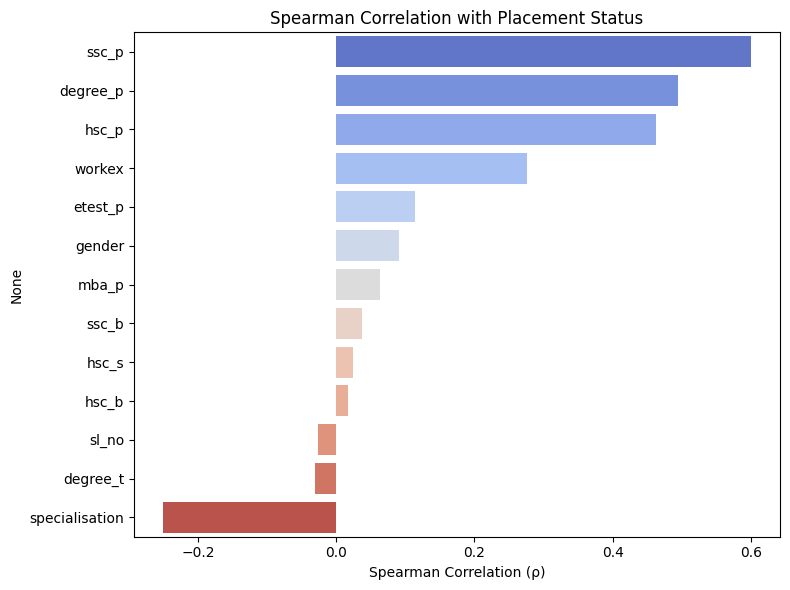

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.barplot(x=spearman_df['SpearmanRho'], y=spearman_df.index, palette="coolwarm")
plt.title("Spearman Correlation with Placement Status")
plt.xlabel("Spearman Correlation (ρ)")
plt.tight_layout()
plt.show()

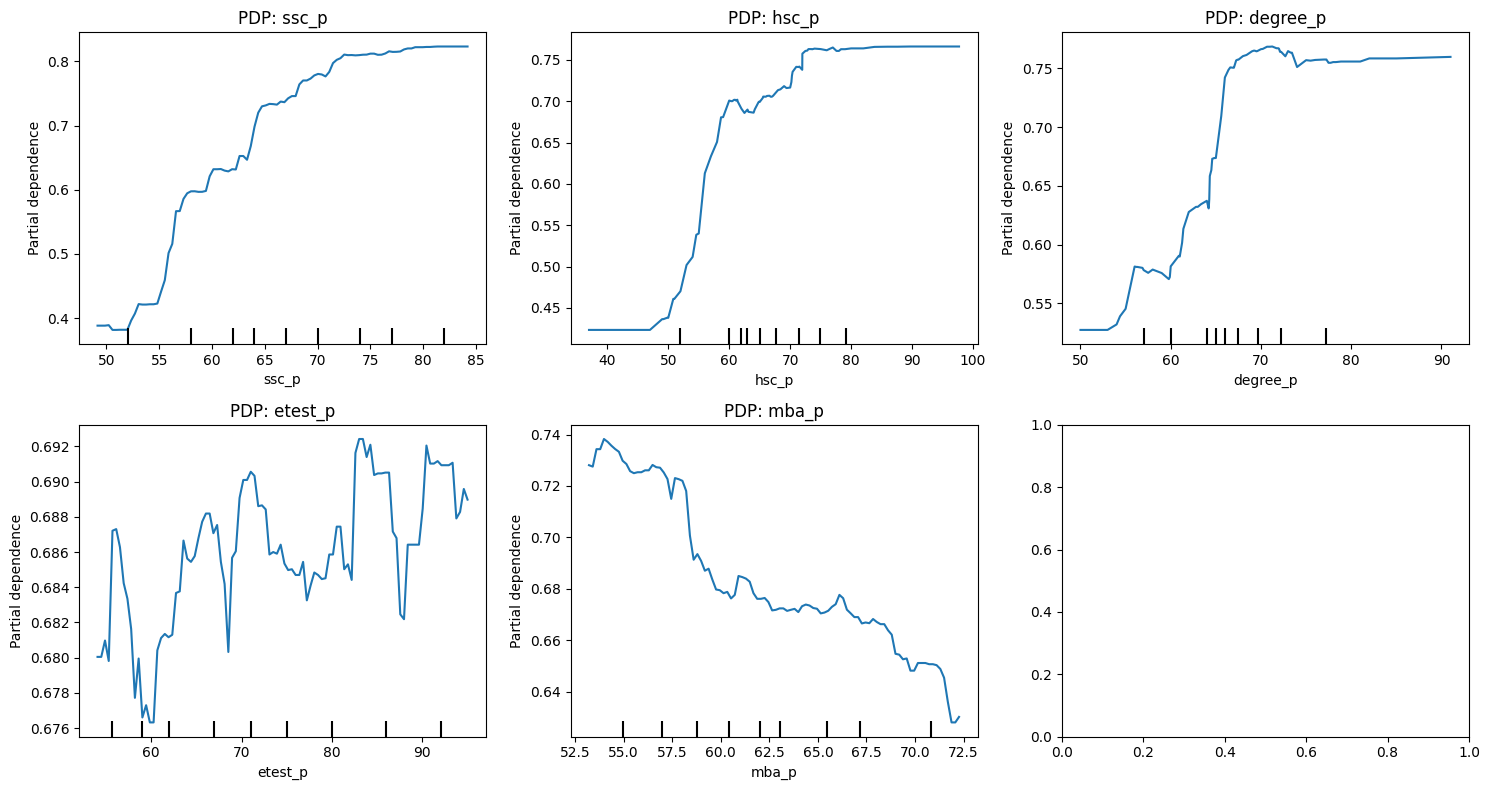

In [47]:
# 수치형 변수만 추려서 PDP 수행
numeric_features = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']  # 연속형 변수만!

# PDP 그리기 (수정된 코드)
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

model = RandomForestClassifier(random_state=12)
model.fit(X, y)

n_cols = 3
n_rows = -(-len(numeric_features) // n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    PartialDependenceDisplay.from_estimator(
        model, X, [feature], ax=axes[i],
        line_kw={"color": "tab:blue"}
    )
    axes[i].set_title(f"PDP: {feature}", fontsize=12)
    axes[i].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()
